In [2]:
import numpy as np
import pickle
from astropy.io import fits
import matplotlib.pyplot as plt

## load in data

In [3]:
with open('./ZorroHRHeaders_05ThruMid07.p','rb') as file:
    headers = pickle.load(file)

In [4]:
from analyzePSFParameters import psfParameters

zorrop = psfParameters(source='Zorro', fileNumbers='Code/ZorroHRIDs_05ThruMid07_filtered.txt', 
                       baseDir='../', filters=(562,832))
zorrop.colors[zorrop.filters[0]] = '#789b73'
zorrop.colors[zorrop.filters[1]] = '#ff9408'


In [5]:
zorrop.loadAllParameters()

## distribution of data

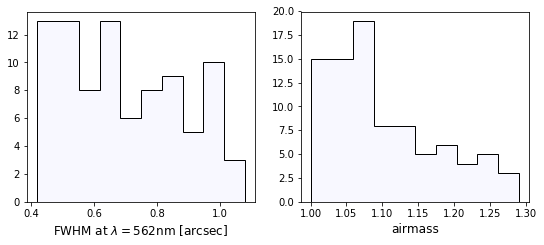

In [9]:
plt.figure(figsize=(9,3.5))
plt.subplot(121)
plt.hist(zorrop.parameters['15'][562]['size'][:,-1], bins=10,
         histtype='stepfilled', edgecolor='k', facecolor='ghostwhite')
plt.xlabel('FWHM at $\lambda=$562nm [arcsec]', fontsize=12);
plt.subplot(122)
plt.hist([headers[number]['AIRMASS'] for number in zorrop.fileNumbers], bins=10, 
         histtype='stepfilled', edgecolor='k', facecolor='ghostwhite')
plt.xlabel('airmass', fontsize=12)
plt.savefig('../Plots/Zorro/seeing&airmass.png', bbox_to_inches='tight', dpi=250)
plt.show();

## analysis plots

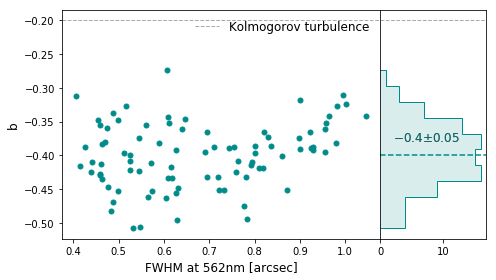

In [12]:
zorrop.chromaticityPlots(save=True)

In [70]:
zorrop.plotEComps(limits=[-.22,.22], save=True)

In [20]:
zorrop.analyzeBinnedParameters()

In [26]:
zorrop.plot30sParameters(psfN='2', figsize=(12,3.7), ellipse=True, save=True,
                          ellipseArgs={'linewidth':1, 'linestyle':'-'}, alpha=0.75,plotArgs={'ms':4})

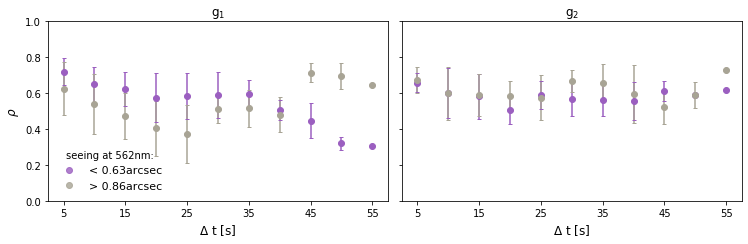

In [19]:
zorrop.plotCorrelations(psfN='12', nSplit=35, nSplit2=68, colors=['#9b5fc0', '#a8a495'], ylims=(0,1), save=True)

In [74]:
zorrop.plotCentroids(centroidFile='../Fits/ZorroHRCentroids_05ThruMid07.p', ms=3, alpha=.9, save=True)

In [15]:
zorrop.analyzeEMag(delay=False, plot=False)

/Users/clairealice/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


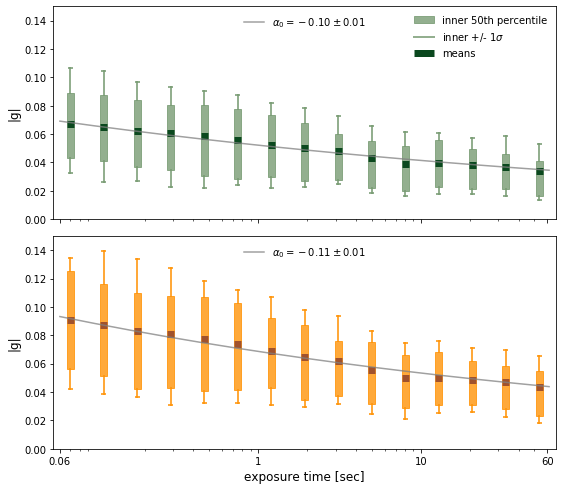

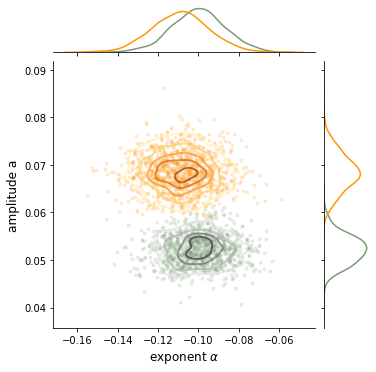

In [16]:
zorrop.plotEMag(limits=(0,.15), delay=False, save=False)

## plotting some PSFs

In [15]:
np.random.choice(zorrop.fileNumbers)

'190619Z0146'

In [13]:
number = '190619Z0122'
if number[2:4]=='06':
    month = 'June' 
elif number[2:4]=='07':
    month = 'July' 
elif number[2:4]=='05':
    month = 'May' 

hdu = fits.open(f'/Users/clairealice/Dropbox/zorrodata/{month}HRstars/'+f'S20{number}b.fits.bz2')
dataB = hdu[0].data
headerB = hdu[0].header
hdu.close()
hdu = fits.open(f'/Users/clairealice/Dropbox/zorrodata/{month}HRstars/'+f'S20{number}r.fits.bz2')
dataR = hdu[0].data[:,:,::-1]
headerR = hdu[0].header
hdu.close()

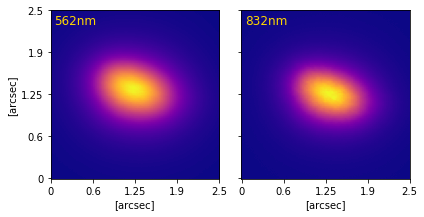

In [14]:
expTime=[0,1000]
labels=[0, .6, 1.25, 1.9, 2.5]
plt.figure(figsize=(6,3))
ax=plt.subplot(121)
plt.imshow(dataB[expTime[0]:expTime[1]].mean(axis=0), origin='lower', cmap='plasma')
plt.xticks([0, 64, 128, 192, 256], labels)
plt.yticks([0, 64, 128, 192, 256], labels)
plt.ylabel('[arcsec]')
plt.xlabel('[arcsec]')
ax.text(5, 235, '562nm', color='gold', fontsize=12)
ax=plt.subplot(122)
plt.imshow(dataR[expTime[0]:expTime[1]].mean(axis=0), origin='lower', cmap='plasma')
plt.xticks([0, 64, 128, 192, 256], labels)
plt.yticks([0, 64, 128, 192, 256], [])
ax.text(5, 235, '832nm', color='gold', fontsize=12)
plt.xlabel('[arcsec]')

plt.tight_layout()
plt.savefig(f'../Plots/Zorro/{number}.png', bbox_to_inches='tight', dpi=250)

## plot dropoff

In [11]:
import analysisHelper as helper

In [12]:
e = np.array([zorrop.parameters['15'][562]['g'], zorrop.parameters['15'][832]['g']])

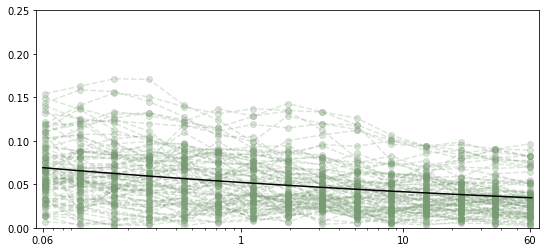

In [39]:
figsize=(9, 4)
color = 562
fig = plt.figure(1, figsize=figsize)
ax = fig.add_subplot(111)
ax.set_xlim(-.25,14.25)
ax.set_xticks([])
ax.set_xticklabels([])
ax.set_ylim(0,.25)
  
pts = np.logspace(-1.22,1.79,15)

logAx = fig.add_subplot(111, label="2", frame_on=False)
logAx.set_yticks([])
logAx.set_xscale('log')
logAx.set_xlim((0.055,.068*1000))
logAx.set_xticks([.06, 1, 10, 60])
logAx.set_xticklabels([.06, 1, 10, 60])

params = np.zeros((88,2))
for i in range(88):
    ax.plot(e[0][i],'o--', color='#789b73', alpha=0.25)
    params[i] = helper.fitDropoff(e[:,i], delay=False)[0]
#     logAx.plot(pts, helper.powerLaw(pts, params), color='lightgrey', alpha=.5)
meanParams = helper.fitDropoff(e.mean(axis=1), delay=False)[0]
logAx.plot(pts, helper.powerLaw(pts, meanParams), color='k', alpha=1)
logAx.set_ylim(0,.25)
# logAx.axvline(meanParams[2])
plt.show()

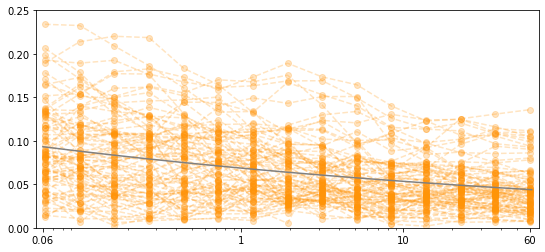

In [40]:
figsize=(9, 4)
color = 832
fig = plt.figure(1, figsize=figsize)
ax = fig.add_subplot(111)
ax.set_xlim(-.25,14.25)
ax.set_xticks([])
ax.set_xticklabels([])
ax.set_ylim(0,.25)
  
pts = np.logspace(-1.22,1.79,15)

logAx = fig.add_subplot(111, label="2", frame_on=False)
logAx.set_yticks([])
logAx.set_xscale('log')
logAx.set_xlim((0.055,.068*1000))
logAx.set_xticks([.06, 1, 10, 60])
logAx.set_xticklabels([.06, 1, 10, 60])

params2 = np.zeros((88,2))
for i in range(88):
    ax.plot(e[1][i],'o--', color='#ff9408', alpha=0.25)
    params2[i] = helper.fitDropoff(e[:,i], delay=False)[1]
#     logAx.plot(pts, helper.powerLaw(pts, params), color='lightgrey', alpha=.5)
meanParams2 = helper.fitDropoff(e.mean(axis=1), delay=False)[1]
logAx.plot(pts, helper.powerLaw(pts, meanParams2), color='grey', alpha=1)
logAx.set_ylim(0,.25)
# logAx.axvline(meanParams[2])
plt.show()

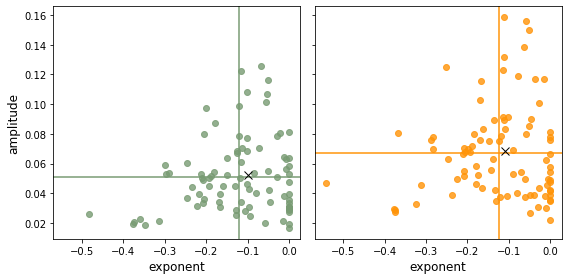

In [50]:
f, (ax1, ax2) = plt.subplots(1,2,figsize=(8,4), sharex=True, sharey=True)
ax1.plot(params[:,1], params[:,0], 'o', alpha=0.8, color=zorrop.colors[562])
ax1.axhline(params[:,0].mean(), color=zorrop.colors[562])
ax1.axvline(params[:,1].mean(), color=zorrop.colors[562])
ax1.plot(meanParams[1], meanParams[0], 'kx', ms=8)
ax1.set_ylabel('amplitude', fontsize=12);
ax1.set_xlabel('exponent', fontsize=12)

ax2.plot(params2[:,1], params2[:,0], 'o', alpha=0.8, color=zorrop.colors[832])
ax2.axhline(params2[:,0].mean(), color=zorrop.colors[832])
ax2.axvline(params2[:,1].mean(), color=zorrop.colors[832])
ax2.plot(meanParams2[1], meanParams2[0], 'kx', ms=8)
# plt.ylabel('amplitude');
ax2.set_xlabel('exponent', fontsize=12)
plt.tight_layout();
plt.savefig('./../Plots/Zorro/Results/eDropIndividual.png', bbox_to_inches='tight', dpi=200)

## parsing observation date/time

In [6]:
tmp = [(headers[k]['DATE-OBS'].split('-')[1:] + headers[k]['OBSTIME'].split(':')[:2],k) 
       for k in headers.keys() if k in zorrop.fileNumbers]

d = {}
for obs in tmp:
    if int(obs[0][2]) < 15:
        key = obs[0][0] + obs[0][1]
    else:
        key = obs[0][0] + str(int(obs[0][1])+1)
    if key in d.keys():
        d[key].append((obs[1], obs[0][2]+obs[0][3]))
    else:
        d[key] = [(obs[1], obs[0][2]+obs[0][3])]
        
d.keys()

dict_keys(['0519', '0524', '0523', '0715', '0716', '0714', '0620', '0621', '0622'])

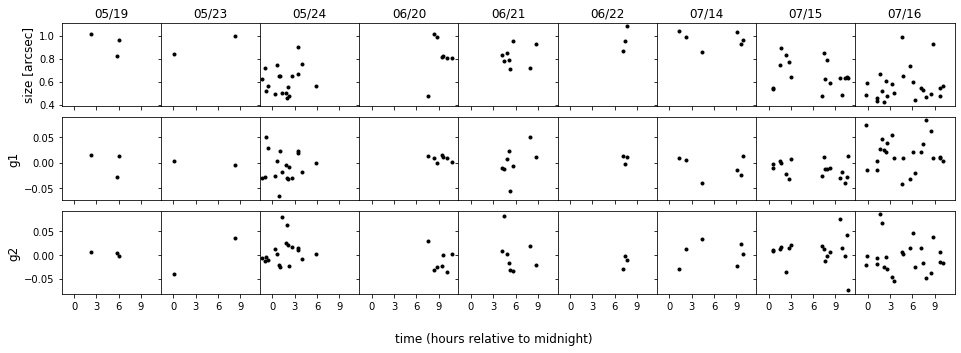

In [19]:
keys = np.sort([k for k in d.keys()])
f, (axes0, axes1, axes2) = plt.subplots(3, len(keys), sharey='row', figsize=(16,5), 
                                        gridspec_kw={'wspace':0, 'hspace':0.125})
for i in range(len(keys)):
    key = keys[i]
    fNs = [d[key][i][0] for i in range(len(d[key]))]
    times = [int(d[key][i][1][:2])*60+int(d[key][i][1][2:]) for i in range(len(d[key]))]
    timeSorted = np.sort(times)

    try:
        before00 = np.where(timeSorted>800)[0][0]
    except IndexError:
        before00 = len(timeSorted)
    orderedT = list(timeSorted[before00:]-1440) + list(timeSorted[:before00])

    sortOrder = np.argsort(times)
    tOrder = list(sortOrder[before00:]) + list(sortOrder[:before00])
    
    datasets = [idx for idx in range(len(zorrop.fileNumbers)) if zorrop.fileNumbers[idx] in fNs]
    sizes = zorrop.parameters['15'][562]['size'][datasets,-1][tOrder]
    g1 = zorrop.parameters['15'][562]['g1'][datasets,-1][tOrder]
    g2 = zorrop.parameters['15'][562]['g2'][datasets,-1][tOrder]
    
    axes0[i].plot(orderedT, sizes,'k.')
    axes1[i].plot(orderedT, g1,'k.')
    axes2[i].plot(orderedT, g2,'k.')

    axes0[i].set_title(key[:2]+'/'+key[2:])

    axes0[i].set_xlim([-100,700])    
    axes1[i].set_xlim([-100,700])    
    axes2[i].set_xlim([-100,700]) 
    
    axes0[i].set_xticks([0, 180, 360, 540])
    axes0[i].set_xticklabels([])
    axes1[i].set_xticks([0, 180, 360, 540])
    axes1[i].set_xticklabels([])
    axes2[i].set_xticks([0, 180, 360, 540])
    axes2[i].set_xticklabels([0, 3, 6, 9])
    
axes0[0].set_ylabel('size [arcsec]', fontsize=12);
axes1[0].set_ylabel('g1', fontsize=12);
axes2[0].set_ylabel('g2', fontsize=12);

f.text(0.5, 0.00, 'time (hours relative to midnight)', fontsize=12, ha='center', va='center');